In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
data = load_breast_cancer()
x = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target,name='target')

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

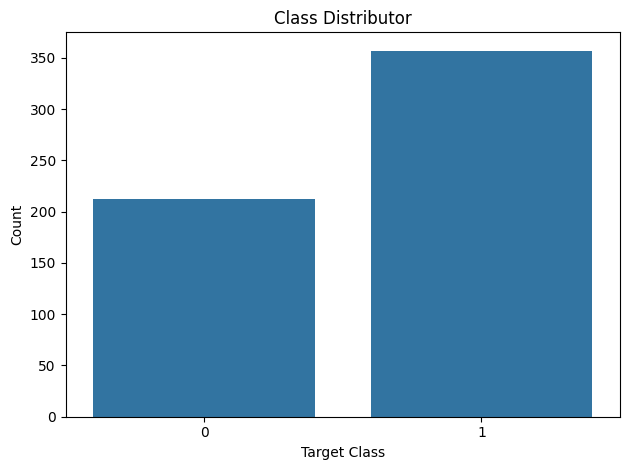

In [16]:
sns.countplot(x=y)
plt.title("Class Distributor")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

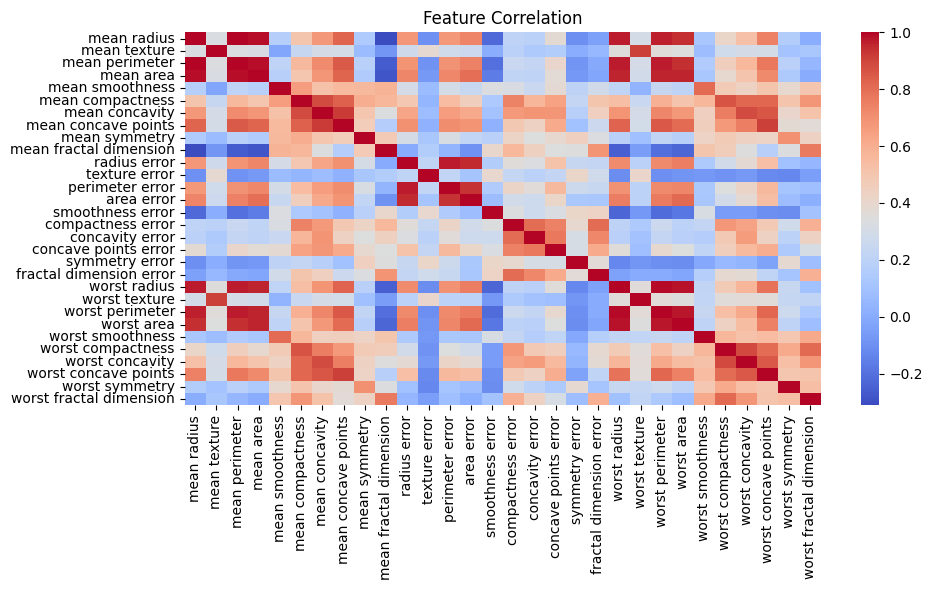

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(),cbar=True,cmap='coolwarm')
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()

In [22]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
model.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
y_pred=model.predict(x_test)

In [24]:
print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))

Confusion matrix: 
 [[39  4]
 [ 1 70]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy:  0.956140350877193


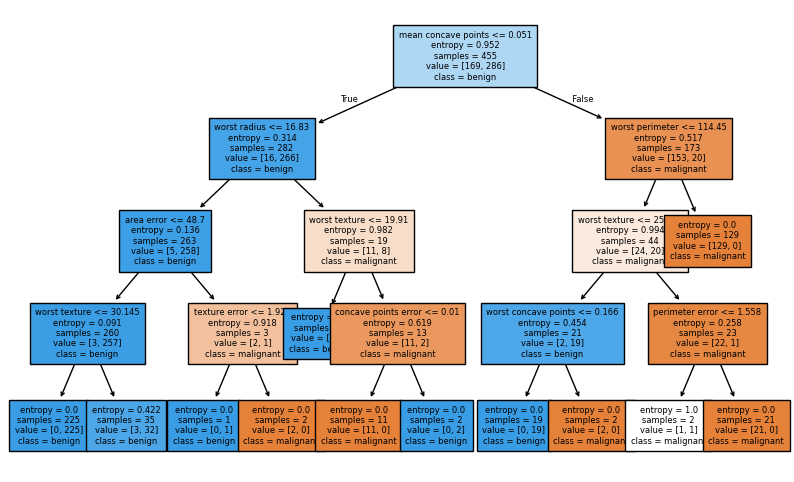

In [28]:
plt.figure(figsize=(10,6))
plot_tree(model,filled=True,feature_names=data.feature_names,class_names=data.target_names,fontsize=6)
plt.show()